# Data Mining, Lecture 1

## Handling data with Pandas

pandas contains high-level data structures and manipulation tools designed to make data
analysis fast and easy in Python. 

pandas is built on top of NumPy and makes it easy to
use in NumPy-oriented applications.

Some of the major features of pandas are:

* Data structures with labeled axes supporting automatic or explicit data alignment.
  This prevents common errors resulting from misaligned data and working with
  differently-indexed data coming from different sources.
* Integrated time series functionality
* The same data structures handle both time series data and non-time series data.
* Arithmetic operations and reductions (like summing across an axis) would pass
  on the metadata (axis labels)
* Flexible handling of missing data.
* Merge and other relational operations found in popular database databases (SQL-
  based, for example).
---

Let's start and import pandas

In [1]:
from pandas import DataFrame, Series
import numpy as np
from io import StringIO 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
IMG_PATH, DATA_PATH = "./img", "./data"


def describe(a):
    if type(a) is np.ndarray:
        print("data:\n{}\nshape:{}\ndtype:{}\ntype: {}".format(a, a.shape, a.dtype, type(a)))
    elif type(a) is pd.Series:
        print("data:\n{}\nshape:{}\ndtype:{}\nname:{}\nindex-name:{}\nindex-type:{}\ntype:{}".format(a, a.shape, a.dtype, a.name, a.index.name,type(a.index), type(a)))
    elif type(a) is pd.DataFrame:
        print("data:\n{}\nshape:{}\ntype:{}".format(a, a.shape,type(a)))
    else:
        print("{}, type:{}".format(a, type(a)))


hrule = lambda x : "="*x
Hrule = lambda x,y: "="*(x//2)+y+"="*(x//2)
Data = lambda file : os.path.join(DATA_PATH, file)
Img  = lambda img : os.path.join(IMG_PATH, img)

## Introduction to pandas Data Structures

In order to get started with pandas, you need to get comfortable with its two workhorse
data structures: Series and DataFrame.

### Series
A Series is a one-dimensional array-like object containing an array of data (of any
NumPy data type) and an associated array of data labels, called its index. 

The simplest example of pandas Series is just a NumPy array

In [2]:
obj = Series(np.arange(10))
describe(obj)

data:
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64
shape:(10,)
dtype:int64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.range.RangeIndex'>
type:<class 'pandas.core.series.Series'>


---

**Note**: Likewise vanilla numpy array, a Series object has also a dtype and a shape.

---

Please note the main difference with numpy arrays. A Series object is 
associated with an object of type index (printed  on the left side).


Since in the previous case we did not specify any index, by default pandas assign
all the integers within the interval $[0, N)$, where $N$ is the length of the series.

We can also access to index ad values of a Series object, independently from each other, as the following:

In [3]:
print(obj.index, obj.values)

RangeIndex(start=0, stop=10, step=1) [0 1 2 3 4 5 6 7 8 9]


It is often useful to create a Series with an index associated with each data point.

You can specify an index while instantiating the Series:

In [4]:
obj = Series([1,2,3,4], index=list('abcd'))
describe(obj)
print(obj['b'])

data:
a    1
b    2
c    3
d    4
dtype: int64
shape:(4,)
dtype:int64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>
2


You can use values of the index when selecting
single values or a set of values. 

Likewise NumPy, a Series object accept all the indexing strategies
provided by a regular array.

---

**Example** - Get Familiar with Series.

In [5]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [6]:
'''
A new Series from obj.
    Result
    -----
    values = [4,4,4,7,3]

Hint: Fancy indexing
''' 
print(obj2[['d']*3 + ['b', 'c']])
print(hrule(20))
      
'''
A series containing only the
positive values
    Result
    -----
    values = [4,7,3]
''' 
print(obj2[obj2>0])
print(hrule(20))


'''
    Result
    ------
    values = [16, 49, 25, 9]
'''
print(obj2**2)
print(hrule(20))

d    4
d    4
d    4
b    7
c    3
dtype: int64
d    4
b    7
c    3
dtype: int64
d    16
b    49
a    25
c     9
dtype: int64


---
It should be noted that a Series is very similar to a fixed-length, ordered dict.
In fact a Series is also a mapping of index to data values. 

It can be therefore replaced into many functions that expect a
dict:

In [7]:

obj = Series(
    [1,2,3,4,5,6,7],
    index=np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe']),
)

# Note: 1 key multiple values
print(obj['Joe']) # access like a dict 
print(hrule(20))

print(obj.Joe)  # access as an object field
print(hrule(20))

# test membership
print('Joe' in obj)
print('Frank' in obj)


Joe    2
Joe    6
Joe    7
dtype: int64
Joe    2
Joe    6
Joe    7
dtype: int64
True
False


**Note**: the index is not unique. Several values can be associated with the same index

---
It is also straightforward to construct a Series from a Python dict.
You just need to give the constructor a dict  as input.

In [8]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
print(obj3)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


The index is ordered by default. However we can also specify the exact order we want.

In [9]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

obj = Series(sdata, index=states) 
describe(obj)

data:
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
shape:(4,)
dtype:float64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


**Note**: California is not included in the original dict sdata. For this reason in the Series object appears a NaN corresponding to the *California* index

---
We can obtain a mask for selecting all the (not)null values from the Series as

In [10]:
describe(obj.isnull()) # equivalently pd.isnull(obj)
print(hrule(20))

describe(pd.notnull(obj)) # equivalently obj.notnull

data:
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
shape:(4,)
dtype:bool
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>
data:
California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
shape:(4,)
dtype:bool
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


Pandas Series provide also the user with the ability of specifying a name for the entire Series object.


In [11]:
obj.name = "population"
obj.index.name = "states"
describe(obj)


data:
states
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64
shape:(4,)
dtype:float64
name:population
index-name:states
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


A Series’s index can be altered in place by assignment:

In [18]:
obj = Series(
    [1,2,3,4,5,6,7],
    index=np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe']),
)
describe(obj)
print(hrule(20))
obj.index = ['Joe', 'Bob', 'Will', 'Bob', 'Will', 'Joe', 'Joe'] 
describe(obj)

data:
Bob     1
Joe     2
Will    3
Bob     4
Will    5
Joe     6
Joe     7
dtype: int64
shape:(7,)
dtype:int64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>
data:
Joe     1
Bob     2
Will    3
Bob     4
Will    5
Joe     6
Joe     7
dtype: int64
shape:(7,)
dtype:int64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


## DataFrame

A DataFrame represents a tabular, spreadsheet-like data structure containing an ordered
collection of columns, each of which can be a different value type (numeric,
string, boolean, etc.). 

A DataFrame has both a row and column index; it can be
seen as a dict of Series sharing the same index.

---

There is a number of ways to construct a DataFrame. 

Nonetheless, one of the most common ways is to build it starting
from a dict of equal-length lists or NumPy arrays.

In [19]:
# each key will correspond to a column of the DataFrame
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9]
}
df = DataFrame(data)  # Note: the index is automatically assigned 
describe(df)

data:
    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
shape:(5, 3)
type:<class 'pandas.core.frame.DataFrame'>


You can rearrange the columns of the dataframe by explicitly defining the exact order in which you want them to appear

In [20]:
df = DataFrame(data, columns=['year', 'state', 'pop'])
describe(df)

data:
   year   state  pop
0  2000    Ohio  1.5
1  2001    Ohio  1.7
2  2002    Ohio  3.6
3  2001  Nevada  2.4
4  2002  Nevada  2.9
shape:(5, 3)
type:<class 'pandas.core.frame.DataFrame'>


Likewise the Series, passing a column that isn’t contained in data will lead to a column of NaN


In [21]:
df = DataFrame(df, columns=['year', 'state', 'pop', 'dept'])
describe(df)

data:
   year   state  pop  dept
0  2000    Ohio  1.5   NaN
1  2001    Ohio  1.7   NaN
2  2002    Ohio  3.6   NaN
3  2001  Nevada  2.4   NaN
4  2002  Nevada  2.9   NaN
shape:(5, 4)
type:<class 'pandas.core.frame.DataFrame'>


## Accessing a DataFrame

### Accessing the column
You can directly access to a column of the DataFrame using a dict-like or attribute-like notation. 
A column of the dataframe  is returned as a Series object having the same index as the original dataframe.


In [22]:
describe(df.state)
print(hrule(20))
describe(df['state']) 

data:
0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object
shape:(5,)
dtype:object
name:state
index-name:None
index-type:<class 'pandas.core.indexes.range.RangeIndex'>
type:<class 'pandas.core.series.Series'>
data:
0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object
shape:(5,)
dtype:object
name:state
index-name:None
index-type:<class 'pandas.core.indexes.range.RangeIndex'>
type:<class 'pandas.core.series.Series'>


Column indexing can also be used for adding a new columns

In [23]:
df['density'] = 10 # broadcast a scalar value
describe(df)
print(hrule(30))

data:
   year   state  pop  dept  density
0  2000    Ohio  1.5   NaN       10
1  2001    Ohio  1.7   NaN       10
2  2002    Ohio  3.6   NaN       10
3  2001  Nevada  2.4   NaN       10
4  2002  Nevada  2.9   NaN       10
shape:(5, 5)
type:<class 'pandas.core.frame.DataFrame'>


In [24]:
df['dept'] = np.arange(df.shape[0]) # we can also use a ndarray
describe(df)
print(hrule(30))

data:
   year   state  pop  dept  density
0  2000    Ohio  1.5     0       10
1  2001    Ohio  1.7     1       10
2  2002    Ohio  3.6     2       10
3  2001  Nevada  2.4     3       10
4  2002  Nevada  2.9     4       10
shape:(5, 5)
type:<class 'pandas.core.frame.DataFrame'>


In [25]:
df['pil'] = Series(np.arange(df.shape[0])) # Pay Attention
describe(df)

data:
   year   state  pop  dept  density  pil
0  2000    Ohio  1.5     0       10    0
1  2001    Ohio  1.7     1       10    1
2  2002    Ohio  3.6     2       10    2
3  2001  Nevada  2.4     3       10    3
4  2002  Nevada  2.9     4       10    4
shape:(5, 6)
type:<class 'pandas.core.frame.DataFrame'>


When you want to create a column from either a list or a numpy array, you must ensure that they have the same length.

If you create a column from a Series, in addition to the length of the series, you must ensure that the Series and
the DataFrame share the same index (on the rows of the DataFrame).


---

**Exercise** - Look at those NAN. Replace it so that half the entries take the value ``dept1`` and the the remaining 
entries get ``dept2``.

In [26]:
df

,year,state,pop,dept,density,pil
0,2000,Ohio,1.5,0,10,0
1,2001,Ohio,1.7,1,10,1
2,2002,Ohio,3.6,2,10,2
3,2001,Nevada,2.4,3,10,3
4,2002,Nevada,2.9,4,10,4


In [27]:
rows, _ = df.shape
firstHalf, secondHalf = int(np.floor(rows/2)), int(np.ceil(rows/2))
tmp = Series(['dept1']*firstHalf+['dept2']*secondHalf, df.index)
tmp

0    dept1
1    dept1
2    dept2
3    dept2
4    dept2
dtype: object

In [28]:
df['dept'] = tmp
describe(df)

data:
   year   state  pop   dept  density  pil
0  2000    Ohio  1.5  dept1       10    0
1  2001    Ohio  1.7  dept1       10    1
2  2002    Ohio  3.6  dept2       10    2
3  2001  Nevada  2.4  dept2       10    3
4  2002  Nevada  2.9  dept2       10    4
shape:(5, 6)
type:<class 'pandas.core.frame.DataFrame'>


**Note**: Remember that the Series object returned by ``df[columnName]`` is always *view* on the original data, thus any change to that object will be reflected
on the dataframe (unless we call copy() the Series)

In [29]:
df['state'][0] = 'New York'
describe(df)

data:
   year     state  pop   dept  density  pil
0  2000  New York  1.5  dept1       10    0
1  2001      Ohio  1.7  dept1       10    1
2  2002      Ohio  3.6  dept2       10    2
3  2001    Nevada  2.4  dept2       10    3
4  2002    Nevada  2.9  dept2       10    4
shape:(5, 6)
type:<class 'pandas.core.frame.DataFrame'>


/tmp/ipykernel_36182/1473095479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'][0] = 'New York'


---
**Wait a minute! What the heck is this Warning?**

First of all, it is just a warning and not an error.

While an error indicates that something is broken, 
such as invalid syntax or an attempt to reference an undefined variable, 
the job of a warning is to alert the programmer about potential bugs or issues with their program,
despite the permitted operation.


*SettingWithCopyWarning* informs you that
your operation might not have worked as expected and that you 
should check the result to make sure you haven’t made 
a mistake.

To understand what SettingWithCopyWarning is about, 
it’s helpful to understand that some actions in pandas can return a view of your data, 
and others will return a copy.

Therefore this Warning is kindly suggesting to check whether
the instruction you issued has worked as you expected to do.

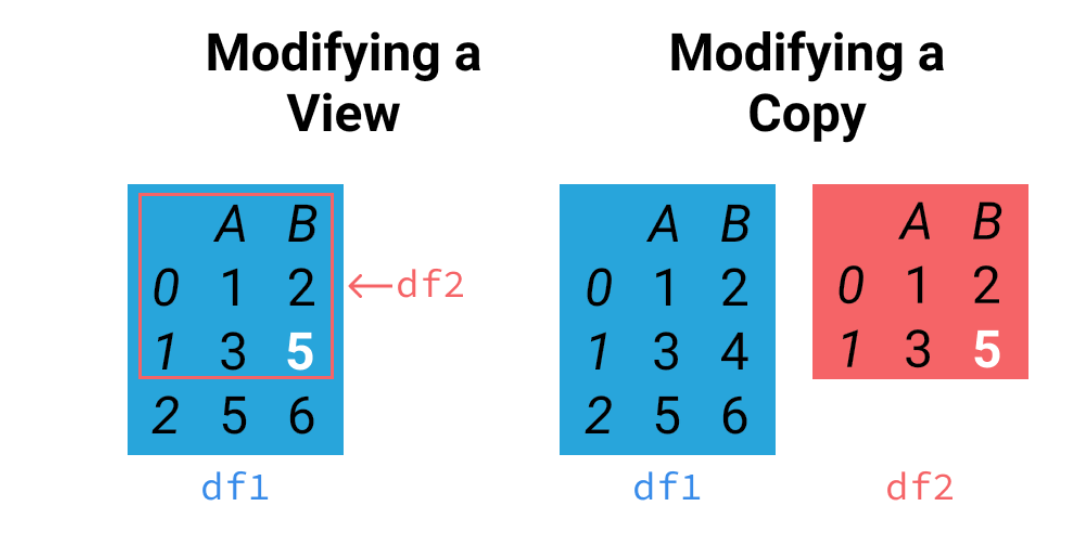

In [30]:
Image(os.path.join(IMG_PATH, 'viewvscopy.png'), width=500)

---
### Accessing via iloc vs. loc
Let's create another DataFrame and try to access to the first row with a dict-like notation

In [31]:
df = DataFrame(data, columns=['year', 'state', 'pop'], index=np.flip(np.arange(0, len(next(iter(data)))))) # LOOK: the index is in reverse order
df

,year,state,pop
4,2000,Ohio,1.5
3,2001,Ohio,1.7
2,2002,Ohio,3.6
1,2001,Nevada,2.4
0,2002,Nevada,2.9


In [32]:
df[0] #ops

KeyError: 0

The following instructions are available to access a row of the dataframe.

**iloc**

iloc gets rows (or columns) at particular positions in the index (so it takes integers or boolean arrays)
    
    

In [33]:
df = DataFrame(data, columns=['year', 'state', 'pop'], index=np.flip(np.arange(0, len(next(iter(data)))))) # LOOK: the index is in reverse order
df

,year,state,pop
4,2000,Ohio,1.5
3,2001,Ohio,1.7
2,2002,Ohio,3.6
1,2001,Nevada,2.4
0,2002,Nevada,2.9


In [34]:
print("index: {}".format(df.index))


print(Hrule(20, "First Element"))
print(df.iloc[0]) 

index: Int64Index([4, 3, 2, 1, 0], dtype='int64')
==========First Element==========
year     2000
state    Ohio
pop       1.5
Name: 4, dtype: object


In [35]:
print(Hrule(20, "Second Element"))
print(df.iloc[1])

==========Second Element==========
year     2001
state    Ohio
pop       1.7
Name: 3, dtype: object


In [41]:
print(Hrule(20, "Element with index 4"))
print(df.loc[4])

==========Element with index 4==========
year     2000
state    Ohio
pop       1.5
Name: 4, dtype: object


In [42]:
print(Hrule(20, "state value of element with index 3"))
print(df.iloc[1]['state'])
print(hrule(5))
print(df.iloc[1, 1]) # 1 because 'state' is the column with index 1
print(df.iloc[1].state) # accessing a field

==========state value of element with index 3==========
Ohio
=====
Ohio
Ohio


**loc**

gets rows (or columns) with particular labels from the index.


In [43]:
df_ = DataFrame(data, columns=['year', 'state', 'pop'], index=[chr(x) for x in range(97, 97+len(next(iter(data))))]) 
describe(df_)


data:
   year   state  pop
a  2000    Ohio  1.5
b  2001    Ohio  1.7
c  2002    Ohio  3.6
d  2001  Nevada  2.4
e  2002  Nevada  2.9
shape:(5, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [44]:
print(Hrule(20, "Element with index a"))
print(df_.loc['a'])

==========Element with index a==========
year     2000
state    Ohio
pop       1.5
Name: a, dtype: object


In [45]:
print(Hrule(20, "Element with index b, pop"))
print(df_.loc['a']['pop']) 

==========Element with index b, pop==========
1.5


In [46]:
print(hrule(5))
print(df_.loc['a', 'pop']) # the same as above

=====
1.5


----
**Exercise**
Get familiar with dataframe indexing.


In [47]:
df = DataFrame(data, columns=['year', 'state', 'pop'], index=[chr(x) for x in range(97, 97+len(next(iter(data))))])
describe(df)

data:
   year   state  pop
a  2000    Ohio  1.5
b  2001    Ohio  1.7
c  2002    Ohio  3.6
d  2001  Nevada  2.4
e  2002  Nevada  2.9
shape:(5, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [49]:
'''
Result
------
    a    2000
    b    2001
    c    2002
    d    2001
    e    2002
Requirement: Dict-like access
''' 
describe(
    df['year']
)

data:
a    2000
b    2001
c    2002
d    2001
e    2002
Name: year, dtype: int64
shape:(5,)
dtype:int64
name:year
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


In [54]:
'''
Result
-----
    'Ohio' of the second element
Requirement: Object-like access + dict-like access
''' 
describe(
    df.state['b'] #? second by enumeration or by key?
)

Ohio, type:<class 'str'>


In [63]:
'''
Result
------
    year       2000
    state      Ohio
    pop         1.5
    density       0
'''
df2 = DataFrame(df)
df2['density'] = 0
describe(
    df2.iloc[0]
)

data:
year       2000
state      Ohio
pop         1.5
density       0
Name: a, dtype: object
shape:(4,)
dtype:object
name:a
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


In [70]:
'''
Result
------
    year    2000
    pop      1.5
    Name: a
Hint: Fancy Indexing
'''
describe(
    DataFrame(df, columns=['year', 'pop']).iloc[0]
)

data:
year    2000.0
pop        1.5
Name: a, dtype: float64
shape:(2,)
dtype:float64
name:a
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


In [76]:
'''
Result
------
  array([2001, 'Nevada', 2.4], dtype=object) #!!!
Hint: .values
'''
describe(
    df.iloc[3].values
)

data:
[2001 'Nevada' 2.4 0]
shape:(4,)
dtype:object
type: <class 'numpy.ndarray'>


In [107]:
'''
Result
------
     array([2001, 2.4], dtype=object) (the fourth element)
Hint: .values
'''
describe(
     (df.loc['d', ['year', 'pop']]).values
)

<class 'numpy.ndarray'>
data:
[2001 2.4]
shape:(2,)
dtype:object
type: <class 'numpy.ndarray'>


In [96]:
'''
Result
------
    array([[2000, 'Ohio', 1.5],
       [2001, 'Ohio', 1.7],
       [2002, 'Ohio', 3.6],
       [2001, 'Nevada', 2.4],
       [2002, 'Nevada', 2.9]], dtype=object)

The entire dataframe as a ndarray
'''
describe(
    df.values
)

data:
[[2000 'Ohio' 1.5 0]
 [2001 'Ohio' 1.7 0]
 [2002 'Ohio' 3.6 0]
 [2001 'Nevada' 2.4 0]
 [2002 'Nevada' 2.9 0]]
shape:(5, 4)
dtype:object
type: <class 'numpy.ndarray'>


## Index Objects
The index of a dataframe is responsible for holding the axis labels and other
metadata (e.g., axis name).

Any array or other sequence-like object of labels can serve 
as an index. 


In [111]:
obj = Series(range(3), index=['a', 'b', 'c'])
index = obj.index

print(index)

Index(['a', 'b', 'c'], dtype='object')


Index objects are immutable.

In [112]:
index[1] = 'c' # ops


TypeError: Index does not support mutable operations

Each dataframe axes has its own index.

In [ ]:
print(df.index) # row index
print(df.columns) # column index


The following table contains the Main Index objects in pandas

|Class|Description|
|:-:|:-:|
|Index |The most general Index object, representing axis labels in a NumPy array of Python objects. |
|Int64Index | Specialized Index for integer values. |
|MultiIndex | “Hierarchical” index object representing multiple levels of indexing on a single axis. Can be thought of as similar to an array of tuples.|
|DatetimeIndex | Stores nanosecond timestamps (represented using NumPy’s datetime64 dtype).|
|PeriodIndex | Specialized Index for Period data (timespans).|


The following table contains a list useful index methods

|Method| Description|
|:-:|:-:|
|append | Concatenate with additional Index objects, producing a new Index|
|diff |Compute set difference as an Index|
|intersection |Compute set intersection|
|union |Compute set union|
|isin |Compute boolean array indicating whether each value is contained in the passed collection|
|delete| Compute new Index with element at index i deleted|
|drop |Compute new index by deleting passed values|
|insert| Compute new Index by inserting element at index i|
|is_monotonic| Returns True if each element is greater than or equal to the previous element|
|is_unique| Returns True if the Index has no duplicate values|
|unique |Compute the array of unique values in the Index|


## Essential Functionality
Here we discuss a series of fundamental instructions for interacting with
the data contained in either a DataFrame or a Series.

### Re-indexing
Create a new object where data
with the data conformed to a new index

In [115]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
describe(obj)

data:
d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
shape:(4,)
dtype:float64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


In [116]:
obj2 = obj.reindex(['a','a', 'b','b', 'd','c','d'])
describe(obj2)

data:
a   -5.3
a   -5.3
b    7.2
b    7.2
d    4.5
c    3.6
d    4.5
dtype: float64
shape:(7,)
dtype:float64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


The elements of the original object are arranged  according to the list passed as input to ``reindex``.

We can also insert new element via the new-index.
More precisely, for each entry whose corresponding index is not
already included in the original frame pandas will create a new entry
with a given default value, which is ``NaN`` if it is not provided.



In [117]:
obj2 = obj.reindex(['a', 'z']) # NaN as default behavior
describe(obj2)

data:
a   -5.3
z    NaN
dtype: float64
shape:(2,)
dtype:float64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


In [118]:
obj2 = obj.reindex(['a', 'z'], fill_value = -1) # full with -1
describe(obj2)

data:
a   -5.3
z   -1.0
dtype: float64
shape:(2,)
dtype:float64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


``reindex`` can be also applied upon DataFrame. In this case
it returns a *copy* of the original frame.


In [119]:
df = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])
describe(df)

data:
   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8
shape:(3, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [120]:
print(Hrule(20, "Re-indexing rows"))
df_ = df.reindex(['a', 'b', 'c', 'd']) # re-indexing rows
describe(df_)

==========Re-indexing rows==========
data:
   Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0
shape:(4, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [121]:
print(Hrule(20, "Re-indexing columns"))
df_ = df.reindex(columns=['Texas', 'Ohio', 'Ohio'])
describe(df_)

==========Re-indexing columns==========
data:
   Texas  Ohio  Ohio
a      1     0     0
c      4     3     3
d      7     6     6
shape:(3, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [122]:
print(Hrule(20, "Re-indexing rows & columns"))
df_ = df.reindex(index=['a','a','b'], columns=['Texas', 'Ohio', 'Ohio'])
describe(df_)

==========Re-indexing rows & columns==========
data:
   Texas  Ohio  Ohio
a    1.0   0.0   0.0
a    1.0   0.0   0.0
b    NaN   NaN   NaN
shape:(3, 3)
type:<class 'pandas.core.frame.DataFrame'>


### Dropping entries from an axis
Dropping means removing an entry from the dataframe along a certain axis.

* Dropping along axis 1 means removing a column of the dataframe.

* Dropping along axis 0 means removing an entry of the dataframe.

It can be done via the ``drop`` method, which asks for an index 
of the dataframe, i.e., the index to be removed.

**Note**: It always returns a copy of the original data.


In [ ]:
df = DataFrame(np.arange(16).reshape((4, 4)),
                index=['Ohio', 'Colorado', 'Utah', 'New York'],
                columns=['one', 'two', 'three', 'four'])
df

In [ ]:
df_ = df.drop(['Colorado', 'Utah']) #dropping rows - by default axis=0
describe(df_)

In [ ]:
df_ = df.drop(['one','four'], axis=1) # dropping columns
describe(df_)

### Indexing, selection, and filtering

Indexing is very similar to numpy. 
Every indexing strategy we have seen for numpy also applies in this context.

---
**Exercise**: Adopt and observe how the indexing techniques of numpy ndarray apply to Series and DataFrame

In [ ]:
obj = Series(np.arange(4.), index=reversed(['a', 'b', 'c', 'd']))
df =DataFrame(np.arange(16).reshape((4, 4)),
              index=['Ohio', 'Colorado', 'Utah', 'New York'],
              columns=['one', 'two', 'three', 'four'])

In [ ]:
print(Hrule(20, "Series"))
describe(obj)

print(Hrule(20, "DataFrame"))
describe(df)

In [ ]:
'''
The first element of the series (positional indexing)
Result
------
    0
'''
describe(
## your code here
)

In [ ]:
'''
The d-element of the series
Result
-----
    0
'''
describe(
## your code here
)

In [ ]:
'''
All the elements within d and c
Result
------
    d 0
    c 1
Hint: slice operator    
'''
describe(
## your code here
)


In [ ]:
'''
Return all the elements less or equal to 2
Result
------
    a    0.0
    b    1.0
''' 
describe(
## your code here
)

In [ ]:
'''
Set all the elements between
the firsts and the last-1 element
of obj to -1
'''
obj_ = obj.copy()
obj_[:-1] = -1

describe(
## your code here
)

In [ ]:
'''
Select the first two rows
of the dataframe
'''
describe(
    df.iloc[:2]
)

In [ ]:
'''
Select all the element of
the dataframe with value greater
than 3 in column 'three'
'''
describe(
## your code here
)


In [ ]:
'''
All the columns except
the last one
'''
describe(
## your code here
)

In [ ]:
'''
As before, all the rows corresponding to
"Utah". All the columns within
"two" and "three".

Hint: use loc function
'''
describe(
## your code here
)

---
## Arithmetic and data alignment

Every math based operation works on indexes. It means that pandas
performs operations between entries having the same index.

There is only one important aspect that you need to be aware of:
the behavior of arithmetic between objects with different indexes. 

When adding together objects, if any index pairs are not
the same, the index of the object obtained as the result of this operation will have the union of their
indexes.

In [ ]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

In [ ]:
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s2

In [ ]:
describe(s1+s2) 

DataFrames have the same behavior

In [ ]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), index=['Ohio', 'Texas', 'Colorado'])
df1

In [ ]:
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df2

In [ ]:
describe(df1 + df2)

The ``NaN`` values can be prevented by specifying a value with the ``fill_value`` parameter.

In [ ]:
# fill the NaN corresponding to index mismatching
tmp = df1.add(df2, fill_value=2, axis=1)
describe(tmp) 

In [ ]:
?df.add

In [ ]:
# fill the NaN corresponding to missing columns
tmp_columns = df2.columns.union(df1.columns)   # set operations between index
tmp = df1.reindex(columns=tmp_columns, fill_value=0)
describe(tmp)

#### Operations between DataFrame and Series
By default, arithmetic between DataFrame and Series matches the index of the Series
on the DataFrame's columns, broadcasting down the rows:

In [ ]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

In [ ]:
series = frame.iloc[0]
series

In [ ]:
describe(frame)
print(hrule(20))

describe(series)
print(hrule(20))

In [ ]:
describe(frame-series)

### Function application and mapping

NumPy ufuncs (element-wise array methods) work fine with pandas objects.


In [123]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
describe(frame)

data:
               b         d         e
Utah   -1.174733 -0.331341  1.263071
Ohio    0.762775  1.134400  0.600971
Texas   0.183379 -0.518876  2.452106
Oregon -1.127796  1.304786  0.183653
shape:(4, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [124]:
describe(np.abs(frame))

data:
               b         d         e
Utah    1.174733  0.331341  1.263071
Ohio    0.762775  1.134400  0.600971
Texas   0.183379  0.518876  2.452106
Oregon  1.127796  1.304786  0.183653
shape:(4, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [125]:
f = lambda x :  x.max() - x.min()
describe(frame.apply(f, axis=0)) # compute f over each column

data:
b    1.937508
d    1.823662
e    2.268453
dtype: float64
shape:(3,)
dtype:float64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


In [126]:
describe(frame.apply(f, axis=1)) # compute f over each row

data:
Utah      2.437805
Ohio      0.533429
Texas     2.970982
Oregon    2.432582
dtype: float64
shape:(4,)
dtype:float64
name:None
index-name:None
index-type:<class 'pandas.core.indexes.base.Index'>
type:<class 'pandas.core.series.Series'>


**Note**: Many of the most common array statistics (like sum and mean ) are also ``DataFrame`` methods.
Therefore, unless we want to compute some weird function on the dataframe, there is no need to pass
the function via the ``apply`` method.

The function passed to apply need not return a scalar value, it can also return a Series or a ndarray
with multiple values:

In [127]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

def f_(x):
    return [x.min(), x.max()] # it is better to use a Series

frame = DataFrame(np.random.randint(0,100,12).reshape(4,3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
describe(frame)

data:
         b   d   e
Utah    36  12   4
Ohio    63  26  60
Texas   36  68  25
Oregon   7   5  35
shape:(4, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [128]:
describe(frame.apply(f))
print(hrule(50))
describe(frame.apply(f, axis=1))

data:
      b   d   e
min   7   5   4
max  63  68  60
shape:(2, 3)
type:<class 'pandas.core.frame.DataFrame'>
data:
        min  max
Utah      4   36
Ohio     26   63
Texas    25   68
Oregon    5   35
shape:(4, 2)
type:<class 'pandas.core.frame.DataFrame'>


In addition to axis-wise functions, in pandas we can also use
element-wise function.

Suppose you wanted to compute a
formatted string from each floating point value in frame.
You can do it with **map**

---
**Exercise**

Get familiar with element-wise functions

In [129]:
pow2 = lambda x : x**2
sqrt = lambda x : np.sqrt(x)
'''
Apply pow2 element-wise over frame
'''
describe(
    frame.apply(pow2, axis=0)
)


data:
           b     d     e
Utah    1296   144    16
Ohio    3969   676  3600
Texas   1296  4624   625
Oregon    49    25  1225
shape:(4, 3)
type:<class 'pandas.core.frame.DataFrame'>


In [130]:
'''
Add a column to frame whose values are
the square root of the b column
'''
frame['new'] = sqrt(frame.b)
describe(
    frame
)

data:
         b   d   e       new
Utah    36  12   4  6.000000
Ohio    63  26  60  7.937254
Texas   36  68  25  6.000000
Oregon   7   5  35  2.645751
shape:(4, 4)
type:<class 'pandas.core.frame.DataFrame'>


In [ ]:
'''
Compute min, mean, std, max
along axis 1 as a new data frame
Hint: define a new function
'''
def statFunc(entry):
    ##TODO your code here

df_ = frame.apply(statFunc, axis=1)
describe(
    df_
)
print(hrule(20))

Set all the elements greater than 50 to 0. 
Then replace all the zero valued elements in the ``b`` column to 'zero'.
Hint: remember the ``np.where`` function?

In [ ]:
def f50(x):
    ##TODO your code here

frame_= frame.apply(f50)
frame_['b'] = frame_.b.map({0:'B'}, na_action='ignore')

describe(frame_)

### Sorting and ranking

We can sort both the index or the values of a dataframe.

When we call a sort-based method pandas always returns a copy of
the original frame.


In [ ]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
obj

In [ ]:
frame = DataFrame(np.arange(8).reshape((2, 4)), 
                  index=['three', 'one'], columns=list("dabc"))
frame

In [ ]:
print(Hrule(20, "Sorting Series"))
sorted_obj = obj.sort_index() # sort_index returns a copy
describe(sorted_obj) # lex-sorting

In [ ]:
'''
With DataFrames we can choose the
axis upon which performing the sorting operation
'''
print(Hrule(20, "Sorting Data-Frames"))
sorted_frame_ax0 = frame.sort_index() # default axis=0
describe(sorted_frame_ax0)

In [ ]:
sorted_frame_ax1 = frame.sort_index(axis=1, ascending=False)
describe(sorted_frame_ax1)

To sort a Series by its *values*, use the *sort_vales* method:

In [ ]:
obj = Series([4,3,2,1,np.NaN], index=list("cdabs"))
obj

In [ ]:
objA = obj.sort_values(ascending=False) # it always returns a copy
objD = obj.sort_values()  # by default ascending=False
describe(objA) 
print(hrule(20))
describe(objD)   

**Note**: NaNs are always pushed to the end of the Series, regardless of the order.

----
### Summarizing and Computing Descriptive Statistics
pandas objects are equipped with a set of common mathematical and statistical methods.

Most of these fall into the category of reductions or summary statistics, i.e., methods
that extract a single value (like the sum or mean) from a Series or a compound of
Series coming from either the rows or the columns of a DataFrame.

The main difference with the NumPy array dedicated methods and the
pandas counterparts is the ability to (automatically) handle missing data.

Beside all the classic methods for computing statistics information
along each axis of a datafame, there are two very useful methods that
allows us to have a `first' approach with the data.

These methods are:

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                    index=['a', 'b', 'c', 'd'],
                    columns=['one', 'two'])
df

In [ ]:
df.describe()

In [ ]:
df.info()

The ``describe`` method provides summary statistics all at once.
The ``info`` method provides information about the type of data stored in the dataframe.
In particular, it highlights the presence of missing values.



In [ ]:
Image(os.path.join(IMG_PATH, 'statistics.png'), width=500)

### Unique Values, Value Counts, and Membership
Another class of related methods extracts information about the values contained in a
one-dimensional Series. To illustrate these, consider this example:

In [ ]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
unique_values = obj.unique() # return all distinct values as a ndarray

In [ ]:
describe(unique_values)

In [ ]:
# return a Series containing counts of unique values
value_count = obj.value_counts(sort=True) 
describe(value_count)

The unique values are not necessarily returned in sorted order, but could be sorted
after the fact if needed ( uniques.sort() ).

In [ ]:
unique_values.sort()
describe(unique_values)

The following table describes several methods related
to sets operation with Series

|Method|Description|
|--|--|
| isin |Compute boolean array indicating whether each Series value is contained in the passed sequence of values |
| match | Compute integer indices for each value in an array into another array of distinct values; helpful for data alignment and join-type operation |
| unique | Compute array of unique values in a Series, returned in the order observed |
| value_counts | Return a Series containing unique values as its index and frequencies as its values, ordered count in descending order |


## Data Loading, Storage, and File Formats

pandas features a number of functions for reading tabular data as a DataFrame
object. The table below summarizes some of them, though read_csv and read_table are
likely the ones you’ll use the most.

| Function | Description |
|--|--|
|read_csv| Load delimited data from a file, URL, or file-like object; use comma as default delimiter |
|read_table| Load delimited data from a file, URL, or file-like object; use tab ( '\t' ) as default delimiter |
|read_fwf | Read data in fixed-width column format (i.e., no delimiters) |
|read_clipboard | Version of read_table that reads data from the clipboard; useful for converting tables from web pages|
|read_excel|Read tabular data from an Excel XLS or XLSX file |
|read_hdf | Read HDF5 files written by pandas |
|read_html | Read all tables found in the given HTML document |
|read_json | Read data from a JSON (JavaScript Object Notation) string representation |
|read_msgpack | Read pandas data encoded using the MessagePack binary format |
|read_pickle | Read an arbitrary object stored in Python pickle format |
|read_sas | Read a SAS dataset stored in one of the SAS system’s custom storage formats |
|read_sql | Read the results of a SQL query (using SQLAlchemy) as a pandas DataFrame |
|read_stata | Read a dataset from Stata file format |
|read_father |Read the Feather binary file format |

All of these funciton are meant to convert text data into a DataFrame. The optional arguments for these methods can be categorized
as:

> Indexing : Can treat one or more columns as the returned DataFrame, and whether to get
    column names from the file, the user, or not at all.
    
> Type inference and data conversion : This includes the user-defined value conversions and custom list of missing value
    markers    
    
> Datetime parsing : Includes combining capability, including combining date and time information spread over multiple columns into a single column in the result.

> Iterating : Support for iterating over chunks of very large files

> Unclead data issues : Skipping rows or a footer, comments, or other minor things like numeric data with thousands separated by commas.

---

Let's focus on the most basic version of the function.

You can read it as:

In [ ]:
df = pd.read_csv(Data('ex1.csv'))
df.head()

By default pandas think the first row is the one containing the name
of each column. 

Also, by default pandas uses ',' as the columns separating character

We can prevent this behavior in different ways:

In [ ]:
df1 = pd.read_csv(Data('ex1.csv'), header=None) # the first row is considered as part of the data
df1.head()

In [ ]:
# this list contains the names of the column
# the first row is still considered as part of the data   
df2 = pd.read_csv(Data('ex1.csv'), 
                  names=["a1", "a2", "a3", "a4", "a5"])
df2.head()

If you have a csv file with column separated by a tab, such as the following file:

In [ ]:
!cat data/ex2.csv

You can either use ``pd.read_table`` or ``pd.read_csv``.

In [ ]:
df = pd.read_table(Data('ex2.csv'))
df.head()

In [ ]:
df = pd.read_csv(Data('ex2.csv'), sep="\t")
df.head()

It is also possible which column will contain the index of the imported dataframe.

For instance, if we want the column ``message`` to be the index of the DataFrame,
we must issue:


In [ ]:
names = ['a', 'b', 'c', 'd', 'message']
df = pd.read_csv(Data('ex2.csv'), names=names, sep="\t", index_col='message')
df

In [ ]:
print(df.head())
print(hrule(50))
# of course we can use
print(df.loc['hello'])

**Note**: There is something wrong with the previous instruction.
The first row is wrongly interpreted as part of the data.
You can prevent this behavior with the ``skiprows`` argument. 

``skiprows`` accept a list of integer, each of whom represent 
the position of a row want to skip.


In [ ]:
df = pd.read_csv(Data('ex2.csv'), names=names, sep="\t", index_col='message', skiprows=[0])
df.head()

Pandas' ``read_csv`` function has almost 50 different arguments. We do not have time for that! 

The following table summarizes some frequently used options related to both ``read_csv`` and ``read_table``.

|Argument | Description|
|--|--|
| path | String indicating file system location, URL, or file-like object | 
|sep, delimiter | Character sequence or regular expression to use to split fields in each row |
| header | Row number to use as column names; defaults to 0 (first row), but should be None if there is no header row |
|index_col | Column numbers or names to use as the row index in the result; can be a single name/number or a list of them for a hierarchical index |
| names | List of column names for result, combine with header=None |
|skiprows | Number of rows at beginning of file to ignore or list of row numbers (starting from 0) to skip. |
|na_values | Sequence of values to replace with NA. |
|comment | Character(s) to split comments off the end of lines. |
|parse_dates | Attempt to parse data to datetime ; False by default. If True , will attempt to parse all columns. |
|keep_date_col | If joining columns to parse date, keep the joined columns; False by default. |
|converters |  Dict containing column number of name mapping to functions (e.g., {'foo': f} would apply the function f to all values in the 'foo' column). |
|dayfirst | When parsing potentially ambiguous dates, treat as international format (e.g., 7/6/2012 -> June 7, 2012); False by default. |
|date_parser |  Function to use to parse dates. |
|nrows | Number of rows to read from beginning of file. |
|iterator | Return a TextParser object for reading file piecemeal. |
|chunksize | For iteration, size of file chunks. | 
|skip_footer | Number of lines to ignore at end of file. |
|verbose | Print various parser output information, like the number of missing values placed in non-numeric columns.|
|encoding | Text encoding for Unicode (e.g., 'utf-8' for UTF-8 encoded text).|
|squeeze | If the parsed data only contains one column, return a Series |
|thousands | Separator for thousands (e.g., ',' or '.' ). |


### Writing Data

It is very simple:

In [ ]:
df = pd.read_table(Data('ex2.csv'))
df

In [ ]:
df.to_csv(Data('ex2_.csv'))

In [ ]:
!cat data/ex2_.csv

Note the first column! By default pandas saves the index of the dataframe along with the data.

You can prevent this behavior as:

In [ ]:
# index
df.to_csv(Data('ex2_.csv'), index=False)
!cat data/ex2_.csv

You can also specify a different separator

In [ ]:
df.to_csv(Data('ex2_.csv'), index=False, sep=";")
!cat data/ex2_.csv

If you want to skip the column names...

In [ ]:
df.to_csv(Data('ex2_.csv'), index=False, sep=";", header=False)
!cat data/ex2_.csv

### Reading JSON

JSON (short for JavaScript Object Notation) has become one of the standard formats
for sending data by HTTP request between web browsers and other applications. It is
a much more free-form data format than a tabular text form like CSV. Here is an
example:


In [ ]:
obj = """
[
{"a": 1, "b": 2, "c": 3},
{"a": 4, "b": 5, "c": 6},
{"a": 7, "b": 8, "c": 9}
]
"""
obj

The structure of a JSON object is very close to a built-in python dict.

In fact you can easily convert the two objects as:

In [ ]:
import json
result = json.loads(obj)
print(result)

And convert it back as:

In [ ]:
asjson = json.dumps(result)
#store it into a file
with open(Data('ex.json'), 'w') as f:
    f.write(asjson)
!cat data/ex.json

The ``pandas.read_json`` can automatically convert JSON datasets in specific arrangements into a Series or DataFrame. 

The default options for pandas.read_json assume that each object in the JSON array
is a row in the table:

In [ ]:
df = pd.read_json(Data('ex.json'))
df.head()

If you need to export data from pandas to JSON, one way is to use the ``to_json`` methods on Series and DataFrame:


In [ ]:
# if no path is specified the method return 
# the dataframe as a string
record_orientation = df.to_json(orient='records')
record_orientation

In [ ]:
index_orientation = df.to_json(orient='index')
print("record:{}\nindex:{}".format(record_orientation, index_orientation))

## Interacting with Web APIs

Many websites have public APIs providing data feeds via JSON or some other format.
There are a number of ways to access these APIs from Python; one easy-to-use
method is the ``request`` module.

Imagine you have to download a dataset from the web:

In [ ]:
import requests
def download_data(url):
    resp = requests.get(url)
    if resp.status_code == 200:
        return pd.read_csv(StringIO(resp.text))
    return None
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = download_data(url)
df.head()

An easier way to do it is to pass the url directly to pandas.

In [ ]:
pd.read_csv(url).head()

## Data Cleaning and Preparation
A significant amount of your time as a data scientist will be spent 
on data preparation.

The task of preparing the data involves actions like: loading, cleaning, 
transforming, and so on.

Usually, these tasks take almost the 80% of the working hours in a
data mining project.

### Handling Missing Data

One of the goals
of pandas is to make working with missing data as painless as possible. 

In fact, all the summary statistics we computed earlier do not account for missing data.
They are automatically ignored by pandas when computing the function.

It should be noted that a ``NaN`` has a different meaning if compared to
the numpy ``NaN``. 

In fact, while in numpy it means not-a-number, here in pandas it stands for
**Not-Available**.

For this reason ``None`` is interpreted as a NaN value.

In [ ]:
from numpy import NaN as than
obj = Series([None, 'better', than, 'Kobe'])
obj

In [ ]:
print(Hrule(20, "Select nan values"))
nulls = obj.isnull() # return a mask pointing to every missing value
describe(nulls)

**Note**: the built-in *None* is treated as a *None*.

#### Filtering Missing Data

While filtering missing data we can either use the mask returned by the ``isnull``
(there is also a method ``notnull``) or use the ``dropna`` function.
Here is an example:

In [ ]:
not_null = obj.dropna() # it returns a copy
describe(not_null) # the row at index 2 has been removed


**Example**:  an equivalent method for removing null values from obj

Hint: Boolean indexing

In [ ]:
describe(
    obj[~obj.isnull()]
)

``dropna`` works also with dataframes. The only difference with respect to Series is that you
need also to provide the axis along which you want to perform the operation.

You can either remove rows or columns (entirely)

In [ ]:
df = DataFrame(np.random.randint(0,50,12).reshape(4, 3), columns=list('abc'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df = df.astype(np.float32) # convert the dataset to floating point
df.values[[0,1,2], [0,2,0]] = than
df

In [ ]:
df.dropna()

As you can see, by default pandas remove an entire record (a row or column) as it finds even just a single missing value.

As a consequence this single missing value can cause a massive loss of information. 
You override this behavior by specifying a different value for the ``how`` argument of dropna (by default it is ``'any'``)

In [ ]:
df.dropna(how='all')

with *how='all'* you are telling to pandas that an entry can be regarded as NaN only if all the attributes have a NaN value.

Rather than removing entire records we can decide to fill the missing values.

The instruction is ``fillna``

In [ ]:
 df.fillna("a").info()

In [ ]:
df['a'].fillna(0, inplace=True)
df

### Removing Duplicates
Duplicate rows may be found in a DataFrame for a number of reasons. 

Here is an example

In [ ]:
df = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})
df

In [ ]:
duplicated = df.duplicated() # return a mask 
duplicated

The ``drop_duplicates`` methods remove
all the duplicates in a DataFrame.
``drop_duplicates`` returns a new DataFrame whose value correspond to the 
value of the original DataFrame where the duplicated Series is False

In [ ]:
df.drop_duplicates() # the six entry is gone!

**Note**:  The membership is evaluated considering the entire row.
It means that two entries, with values $\langle e^i_0, e^i_1 \dots e^i_n \rangle$,
$\langle e^j_0, e^j_1 \dots e^j_n \rangle$ are considered equal if their values
match on every attributes.

You can overwrite this behavior by specifying a subset of columns.


In [ ]:
df.drop_duplicates(['k1'])

When a duplicated value is found, pandas always keeps the first occurrence of the value.

You can override this behavior as:

In [ ]:
df.drop_duplicates(['k1'], keep='last')

#### Transforming Data Using a Function or Mapping
Let's assume we want to perform some transformation based on values contained
into a data structure.

Consider the following hypothetical situation.
These are data about several type of meat.

In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'],'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}
data

Suppose you need to add a column representing the animal.

The ``map`` method comes in handy. 
It is called on a Series and it accepts a function or dict-like object containing a 
mapping. 
However, we have a small problem in that some of the meats are capitalized and
others are not.

Thus, we need to convert each value to lowercase using the ``str.lower``
Series method:

In [ ]:
data['animal'] = data.food.str.lower()
data

Now we can pass the dict ``meat_to_animal`` to the map function over the desired column

In [ ]:
data['animal'] = data.animal.map(meat_to_animal)
data

Although the ``map`` method can be used for replacing values in a DataFrame there is 
a more suitable way of doing it, i.e., via the ``replace`` function.

You can pass either a pair of scalar values, a pair of array-like values or a dict.

The replace function, unless you pass ``inplace=True``, always returns a copy of the original data

In [ ]:
obj = Series([1., -999., 2., -999., -1000., 3.])
obj_ = obj.replace(-999, than)
obj_


In [ ]:
# the replacement is pairwise
obj.replace([-999, 2], [-than, -2], inplace=True)
obj

In [ ]:
#the arguments don not need to have the same size
obj.replace([-than, -2],-10, inplace=True)
describe(obj)

In [ ]:
                 
# you can also pass a dict
obj.replace({-10:-99999}, inplace=True)
describe(obj)

**Exercise**

In [ ]:
df = DataFrame(np.random.randint(0,50,12).reshape(4, 3), columns=list('abc'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df = df.astype(np.float32) # convert the dataset to floating point
df.values[[0,1,2], [0,2,0]] = np.nan
df

In [ ]:
'''
Create a new column 'd' where
there is 'Missing' if 
the corresponding row contains
a Nan in the column 'a', otherwise
'd' will contain the value 'not missing'

Hint: np.where
'''


### Discretization and Binning

Continuous data is often subject a process of discretization, i.e., 
the continuous value is divided into separate bins.

Suppose you have data about a group of people in a study, and you want to group
them into discrete age buckets.

There is the function ``cut``.

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

In [ ]:
df = pd.DataFrame(np.column_stack([ages, cats]), columns=['Age', 'Bin'])
df

Bins are represented via a pandas Categorical object. 

It can be treated like an array of strings.

In addition to the name/label associated with each bin, it also stores the interval 
every bin refers to.

Also, every bin is associated with a certain code.

In [ ]:
print("codes:{}\ncategories:{}".format(cats.codes, cats.categories))

``IntervalIndex`` can be seen as an ordered collection of elements, where each element denotes a range of values.

In [ ]:
intIndex = pd.interval_range(start=0, end=5)
print(intIndex)
intIndex[0] > intIndex[1]

You can see the number of element inside each bin as:

In [ ]:
print(cats.value_counts())
print(hrule(20))

The ``cut`` operation can be customized.
>If you specify ``right=False`` the intervals become closed to the left

>With ``labels`` you can specify a custom label for each bin

>With the argument ``precision`` you can set the number of decimal values to take into account while ``binning" the Series



In [ ]:
# here we want 4 bins
df['Bin'] = pd.cut(ages,4,right=False, precision=0) 
df['Label'] = pd.cut(ages,4, labels=['kid', 'teen', 'young', 'old'], right=False)
df

Instead of passing a list of bins you can just specify the number of bins you wish to divide your data.

By default ``cut`` splits the data accordingly to an equal-width strategy.

In [ ]:
df['Bin'] = pd.cut(df['Age'], 5, precision=0)
df['Label'] = pd.cut(df['Age'], 5, precision=0)

df_ = df.groupby('Bin').count().reset_index().iloc[:, 0:2].rename(columns={'Age': 'Count'})
_ = sns.barplot(x='Bin', y='Count', data=df_, label='Count')

However if you wish to split the data in quantiles you can use the ``qcut`` function.

In [ ]:
df['Age'] = df['Age'].astype(int)
df['Bin'] = pd.qcut(df['Age'], 5, precision=0)
df['Label'] = pd.qcut(df['Age'], 5, precision=0)

df_ = df.groupby('Bin').count().reset_index().iloc[:, 0:2].rename(columns={'Age': 'Count'})
_ = sns.barplot(x='Bin', y='Count', data=df_, label='Count')


### Permutation and Random Sampling
A Permutation is a random reordering.

Computing the permutation of a Series of the rows of a DataFrame is fairly simple.

There is the function from numpy ``np.random.permutation``.

If you call ``np.random.permutation`` with in a integer $N$, numpy will return
an array of number in range $[0, N)$ in random order.


In [ ]:
# it returns 10 number whitin [0,10) in random order
np.random.permutation(10)

**Exercise**: Describe a way for computing a permutation of a dataframe using 
the permutation function. 

In [ ]:
## your code here

**Exercise**: Extract a random subset from the dataframe of size =$K=3$

In [ ]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
df

In [ ]:
## your code here

A simpler way to extract a set of data from the dataframe is via the method ``take``

In [ ]:
indexes = np.random.permutation(df.shape[0])
df.take(indexes)#np.random.permutation(indexes))


It is even easier with the method ``sample`` of ``DataFrame``.

In [ ]:
df.sample(df.shape[0])

By default  pandas samples without replacement.  
To override this behavior you can use  ``replace=True``
to sample:

In [ ]:
sample = df.sample(n=3, replace=True)
sample

## Computing Indicator/Dummy Variables/One Hot Encoding

When you have categorical data, the most common way to represent it is
via indicator variables (also known as Dummy Variables)

If a column in a dataframe has $k$ distinct values, using dummy variables it 
will be represented as a $k$-size vector, where each position corresponds 
to a value. If there is a 1 in the i-th position of this array, it means that
the corresponding sample has the i-th categorical value.

The ``get_dummies`` function compute the dummy variables.


In [ ]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
df

In [ ]:
df_ = pd.get_dummies(df['key'], prefix='key') 
df_

**Example**
Merge the one-hot encoded dataframe with the original dataframe.
Hint: The two dataframes share the same index

In [ ]:
df.join(df_).drop('key', axis=1)


### Vectorized String Functions in pandas

Cleaning up a messy dataset for analysis often requires a lot of string munging and
regularization. 

Also, to make matters worse, column containing strings may have missing data.


In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
    'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)
data

Any string and regular expression methods can be applied (passing a
lambda or other function) to each value using the ``map`` function.

However, you will struggle with NaN (null) values. 

To cope with this, Series has array-oriented methods for string operations that skip NA values. 

These are accessed through Series’s ``str`` attribute. 

In this way you can directly access the string underlying each element stored in the Series object without considering
the NaN values.

In [ ]:
import re
# after accessing the str attribute you can
# perform any string-manipulation function (including regex)
print(data.str.contains('gmail')) 

In [ ]:
#extract different information from the string
#using regular expressions
print(data.str.findall('([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})', flags=re.IGNORECASE))

In [ ]:
#check wheter or not a string repsect a certain pattern
print(data.str.match('([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})', flags=re.IGNORECASE))

In [ ]:
#create a dataframe. Each column correspond to a matched group
describe(data.str.extract('([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})', flags=re.IGNORECASE))

**Example**: Create a data frame with two columns containing the username and the domain of the email address, respectively.


In [ ]:
def extract(series):
    first, second = series.str.split('@').str
    return pd.DataFrame({'username':first, 'domain': second}, index=series.index)
describe(extract(data))

Here is a table with almost every method for handling string objects

In [ ]:
Image(Img('tab.png'), width=500, height=300)

## Data Wrangling: Join, Combine, and Reshape
### Hierarchical Indexing
Hierarchical indexing enables the opportunity of having multiple index levels on a single axis.


Let’s start with a simple example; create a Series with a list of lists (or arrays) as the index:


In [ ]:
data = pd.Series(np.random.randn(9), index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'], [1, 2, 3, 1, 3, 1, 2, 2, 3]])
data

This is a series with a multi index.


In [ ]:
print(data.index)

With a hierarchically indexed object, you can select subsets of data via partial indexing.


In [ ]:
print(data['a'])

In [ ]:
# fancy index on the first index
print(data.loc[['b', 'd']])

In [ ]:
#inner level selection (likewise a 2-dimensional array)
print(data.loc['a':'b', 1:2])

Hierarchical indexing plays an important role in reshaping data and group-based operations.

For example, you can re-arrange the data into
a ``DataFrame`` using its ``unstack`` method:

In [ ]:
data

In [ ]:
df = data.unstack()
df

The first-level index becomes the axis-0 index while the inner-index becomes the axis-1 index (the columns).

This inverse operation is the following:

In [ ]:
describe(df.stack())

---
In a DataFrame, both axis can have a hierarchical index:

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)), 
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])
frame

In [ ]:
describe(frame.loc['a',1])

In [ ]:
frame.loc[('b',1),'Ohio']

#### Reordering and Sorting Levels

Sometimes, you may need to  rearrange the order of the levels on an axis. 

Also, you may need to sort the data by a certain criterion.

The ``swaplevel`` method takes two level numbers or names
and returns a new object where the levels provided as input have been swapped.

In [ ]:
# associate a label with each index
frame.index.names = ('key1', 'key2')
frame.columns.names = ['state', 'color']
print(frame)
print(Hrule(20, "swap indexes"))
swapped_frame = frame.swaplevel('key1', 'key2')
print(swapped_frame)

When swapping, pandas does not automatically sort the values of the data-frame
accordingly to the new configuration the index levels.

You need to use the *sort_index*. 

In [ ]:
print(Hrule(20, "Sort level 0"))
print(swapped_frame.sort_index(level=0))
print(Hrule(20, "Sort lebel 1"))
print(swapped_frame.sort_index(level=1))

Each level corresponds to a particular index.

In this case (after the swapping) ``key2`` corresponds to ``level=0`` while
key1 corresponds to ``level=1``.

Actually, you do not need to name each index.
You can swap them by specifying their level.
```
 df.swaplevel(0,1)
```
**Exercise**: Make ``swapped_frame`` as the original frame

In [ ]:
frame

In [ ]:
## your code here

Many descriptive and summary statistics on DataFrame and Series have a level
option in which you can specify the level you want to aggregate by on a particular
axis.

In [ ]:
frame

In [ ]:
print(frame.sum(level=1))
print(hrule(30))

print(frame.mean(level='color', axis=1))

### Indexing with a DataFrame Column 
Sometimes, you need to use the values contained in one or more column 
as the index of your dataframe.

You need to use the ``set_index`` method. Which asks for the
column you want to use as the index (potentially multi-index) of your dataframe.

This function returns a copy of the original dataset unless you specify the ``inplace=True``.

Here’s an example DataFrame

In [ ]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
    'c': ['one', 'one', 'one', 'two', 'two',
    'two', 'two'],
    'd': [0, 1, 2, 0, 1, 2, 3]})
frame

In [ ]:
frame_ = frame.set_index(['a','b'])
print(frame_)
print(hrule(20))
frame_ = frame.set_index(['c', 'd']).sort_index(level=[0,1], ascending=[True, False])
print(frame_)

By default the columns selected as index are removed from the DataFrame
However you can keep them specifying:
```
frame.set_index(['c', 'd'], drop=False)
```

### Combining and Merging Datasets
Data contained in pandas objects can be combined together in a number of ways:

1. ``pandas.merge`` connects rows in DataFrames based on one or more keys. This will be familiar to users of SQL or other relational databases, as it implements database join operations.
2. ``pandas.concat`` concatenates or “stacks” together objects along an axis.
3. ``combine_first`` enables splicing together overlapping data to fill in missing values in one object with values from another.

---

Merge or join operations combine datasets by linking rows using one or more keys.

These operations are central to relational databases (e.g., SQL-based). 

The merge function in pandas is the main entry point for using these algorithms on your data.
Let’s start with a simple example

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a'],
    'data1': range(5)})
df1

In [ ]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})
df2

This is an example of a **many-to-one** join;

Calling merge with these objects we get

In [ ]:
pd.merge(df1,df2, on='key') # the key column must be present on every data-frame

It the columns upon which we need to perform a join are named differently in the two datasets,
we can specify them directly.

In [ ]:
# rename the columns
df1 = df1.rename(columns={'key': 'lkey'})
df2 = df2.rename(columns={'key': 'rkey'})

pd.merge(df1, df2, left_on='lkey', right_on='rkey')

You may notice that by default pandas performs an inner join, therefore
the joint dataframe includes only the rows involved in the join operation.

You can override this behavior with the ``how`` argument. 

It represents the strategy according to which the join is performed.

There are 4 possible choice: 
1. inner 
2. outer 
3. left
4. right

---
**Many-to-many** merges have well-defined, though not necessarily intuitive, behavior.
Here’s an example

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],'data2': range(5)})
print(df1)
print(hrule(30))
print(df2)

Many-to-many joins form the Cartesian product of the rows.

Since there were three
'b' rows in the left DataFrame and two in the right one, there are six 'b' rows in the
result. 

The join method only affects the distinct key values appearing in the result


In [ ]:
pd.merge(df1, df2, on='key', sort=True)

If you need to  perform the merging operation upon the actual keys of the data frame. 

In such scenario you must pass to the function merge the following arguments: 
```
    pd.merge(..., left_index=True, right_index=True)
```
By default, i.e., with how='ineer', you will obtain the intersection of the two frames.

**Example**: compute the union of df1 and df2 wrt to their indexes

In [ ]:
df1 = DataFrame(dict(key=list('abaabc'), value=range(6)))
df2 = DataFrame({'key': list('abbcdea'), 'value':range(7)})
df1, df2 = df1.set_index('key'), df2.set_index('key')

print(df1)
print(hrule(30))
print(df2)

In [ ]:
pd.merge(df1, df2, left_index=True, right_index=True, how = 'outer')# your code here

DataFrame has also a convenient ``join`` instance for merging by index. 

It can also be used
to combine together many DataFrame objects having the same or similar indexes **but
non-overlapping columns**. 

In [ ]:
left = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],index=['a', 'c', 'e'],columns=['Ohio', 'Nevada'])
right = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]], index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

print(pd.merge(left, right, left_index=True, right_index=True, how='outer'))
print(Hrule(20, "Is equivalent to"))
print(left.join(right, how='outer'))


Here is a table containing all the possible merge arguments

|Argument|Description|
|--|--|
|left|DataFrame to be merged on the left side.|
|right|DataFrame to be merged on the right side.|
|how|One of 'inner' , 'outer' , 'left' , or 'right' ; defaults to 'inner'|
|on|Column names to join on. Must be found in both DataFrame objects. If not specified and no other join keys |
|left_on | Columns in left DataFrame to use as join keys.|
|right_on | Analogous to left_on for left DataFrame.|
|left_index | Use row index in left as its join key (or keys, if a MultiIndex).|
|right_index | Analogous to left_index. |
| sort | Sort merged data lexicographically by join keys; True by default (disable to get better performance in some cases on large datasets)|
| suffixes | Tuple of string values to append to column names in case of overlap; defaults to ('_x', '_y') (e.g., if 'data' in both DataFrame objects, would appear as 'data_x' and 'data_y' in result).|
| copy | If False , avoid copying data into resulting data structure in some exceptional cases; by default always copies.|
| indicator | Adds a special column _merge that indicates the source of each row; values will be 'left_only' , 'right_only' , or 'both' based on the origin of the joined data in each row.|

---

### Concatenating Along an Axis
In the context of pandas objects such as Series and DataFrame, having labeled axes
enable you to further generalize array concatenation. In particular, you have a num‐
ber of additional things to think about:
1. If the objects are indexed differently on the other axes, should we combine the distinct elements in these axes or use only the shared values (the intersectio)?
2. Do the concatenated chunks of data need to be identifiable in the resulting object?
3. Does the “concatenation axis” contain data that needs to be preserved? In many cases, the default integer labels in a DataFrame are best discarded during concatenation

The concat function in pandas provides a consistent way to address each of these
concerns. 

Suppose we have
three Series with no index overlap

In [ ]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5,6], index=['f', 'g'])

print(pd.concat([s1, s2, s3])) # by default concat works on axis 0
print(hrule(20))
print(pd.concat([s1,s2,s3], axis=1, sort=False))

**Note**: Non-overlapping indexes are filled with NaN (it is like an outer join).

If you want to retain only the common values you can do it with the *join* argument.


In [ ]:
s4 = Series([0,2,4], index=['a', 'b', 'e'])
pd.concat([s1, s4], axis=1,  sort=False, join='inner') 

if you need to identify the concatenated piece in the resultyou can create a hierarchical index as

In [ ]:
result = pd.concat([s1, s2, s3], keys=['s1', 's2', 's3'])
result

The same operation on axis=1 produce a DataFrame where each column is named after the element in keys

In [ ]:
result = pd.concat([s1, s2, s3], keys=['s1', 's2', 's3'], axis=1, sort=False)
result

The same logic applies on DataFrame as well.

In [ ]:
df1 = DataFrame(np.arange(6).reshape(3,2),index=list('abc'), columns=['one', 'two'])
df2 = DataFrame(np.arange(4).reshape(2,2),index=list('ac'), columns=['three', 'four'])
print(df1)
print(hrule(20))
print(df2)
print(hrule(20))
print(pd.concat([df1,df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'], sort=False))

Often, you just need to concatenate multiple dataset without concerning about the the index, because it
could provide irrelevant information.

In this case you must specify the argument *ignore_index=True*.

In [ ]:
df1 = DataFrame(np.arange(10).reshape(2,5), columns=list('abcde'))
df2 = DataFrame(np.arange(10).reshape(2,5), columns=list('abcdf'))

pd.concat([df1, df2], axis=0, ignore_index=True, sort=False)

### Reshaping and Pivoting

#### With Hierarchical Indexing
There are tow main instructions:
1. stack: pivots from the columns to the rows
2. unstack : pivots from the rows to the columns (inverse of stack)

In [ ]:
data = DataFrame(np.arange(6).reshape(2,3), index=pd.Index(['Ohio', 'Colorado'], name='state'), columns=pd.Index(['one', 'two', 'three'], name='number'))
print(data)
print(Hrule(20, "Stacking"))

# produce a dataframe with a hierarchical index (state, number)
stacked = data.stack()
print(stacked)
# accessing element
print("Ohio->one:{}".format(stacked.loc['Ohio', 'one']))
print(Hrule(20, "Unstacking"))

unstacked = stacked.unstack() # return in the original form
print(unstacked)

By default the innermost level is stacked (or unstacked). 

However, you can modify this behavior by sepcifying the level of the index explictly

In [ ]:
print(stacked.unstack(0)) # the outer index becomes the column index
print(Hrule(20, "See the difference?"))
print(stacked.unstack(1)) # the inner index becomes the column index


### Pivoting
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a “pivot” table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame. This function does not support data aggregation, multiple values will result in a MultiIndex in the columns. See the User Guide for more on reshaping.

In [ ]:
df = pd.read_csv(Data('nba.csv'), usecols=['PLAYER', 'POSITION', 'SALARY_MILLIONS', 'TEAM'], nrows=100)
df.drop_duplicates(subset='PLAYER', keep='first', inplace=True)
df.head(10)


In [ ]:
#pivoting
pivoted = df.pivot(index='POSITION',  columns="PLAYER", values="SALARY_MILLIONS")
pivoted.head()

### Melting
An inverse operation to pivot for DataFrames is pandas.melt . Rather than trans‐
forming one column into many in a new DataFrame, it merges multiple columns into
one, producing a DataFrame that is longer than the input

In [ ]:
melted = pd.melt(df, ['TEAM'])
melted.head(20)

Each column becomes a value under the 'variable' column of the melted DataFrame.

In [ ]:
print("df columns: {} vs melted variable values: {}".format(df.columns.values,  melted['variable'].unique()))

A more sophisticated way of using the melt operation would be:

In [ ]:
# consider only the POSITION and PLAYER columns
melt = pd.melt(df, id_vars=['TEAM'], value_vars=['POSITION', 'PLAYER'])
print(melt.head())
print(melt.variable.unique())

#actually we can also omit the id_vars argument
print(hrule(50))
print(pd.melt(df, value_vars=["POSITION", "PLAYER"]).head())

## Data Aggregation and Group Operations

The entire process of data aggregation can be summerized by the following image



In [ ]:
Image(Img('sac.png'), width=600)

This image represents a three-stages paradigm called *split-apply-combine*.

> The first stage of the process is concerned with the splitting of the data into several groups based on some criteria

> The second stage is concerned with the application of a function upon the grouped data

> The third and final stage asddress the problem of collecting and presenting the final result, i.e, the result obtained by the application of the function performed in the second stage.

The first part of the process is performed by the group_by method.

It needs a list of columns names, i.e, the columns upon which the grouping operation has to be performed. 

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'], 'key2' : ['one', 'two', 'one', 'two', 'one'], 'data1' : np.random.randn(5), 'data2' : np.random.randn(5)})
df

In [ ]:
grouped_object = df.groupby(by=['key1', 'key2'])
grouped_object

Once you have the grouped object you can apply any function. 

For instance, if you want to compute the size each group into which the datast has been splitted:

In [ ]:
print(grouped_object.size())

#of course you can do it in one line of code
result = df.groupby('key1').mean()
print(result)

**Question** Let's focus on the dataframe *result*. Which is its index? 

---

If you want to prevent this behavior, you can call the `reset_index` method upon the 
final data frame

In [ ]:
result = result.reset_index()
result

In [ ]:
# or equivalently
# result = df.groupby('key1', as_index=False).mean()
result

### Iterating Over Groups
Sometimes, you may need to iterate over the groups generated by the previous stage.

The grouped object provides a way of generating a sequence of 2-tuples containg
the group name and the group data

In [ ]:
for name, group in df.groupby('key1'):
    print(name)
    print(group, type(group))

In [ ]:
#in case of grouping wrt multiple columns
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print(k1,k2)
    print(group, type(group))

**Note**: Each group is a simple DataFrame, and of course you can treat it as a regular DataFrame object



#### Selecting Column of Subset of Columns
Indexing a GroupBy object created from a DataFrame with a column name or array
of column names has the effect of column subsetting for aggregation.

Here are several ways for selecting subset of columns with the ``group_by`` operation

In [ ]:
describe(df.groupby('key1')['data1'].mean())
print(Hrule(20, "Is equivalent to"))
describe(df['data1'].groupby(df['key1']).mean())

In [ ]:
describe(df.groupby('key1')[['data2']].mean())
print(Hrule(20, "Is equivalent to"))
describe(df[['data2']].groupby(df['key1']).mean())
print(hrule(50))

**Note**: The first two objects are Series while the second two objects are DataFrame.

The reason underlying this behavior resides in the notation used for selecting the column.

In fact, it should be noted that ``df[['col_name]]`` (double square bracket) returns a DataFrame as opposed
to ``df[col_name]`` which return a Series object.

### Grouping with Dicts and Series
Grouping information may exist in a form other than an array. Let’s consider another
example DataFrame:


In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
    columns=['a', 'b', 'c', 'd', 'e'],
    index=['Joe', 'Steve', 'Wes', 'Kendrick', 'Travis'])
people

Now suppose that you have knowledge that columns a-b-c form a group A, and columns d-e form another group B.

You want to compute some statistic wrt to groups A,B.

One way of doing so is to remap each column in order to embrace the group A and B distinction and then apply the grouping operation.


In [ ]:
mapping = {'a': 'A', 'b':'B', 'c':'A', 'd':'A', 'e':'A'}

# axis=1 means that we are grouping the columns
people.groupby(mapping, axis=1).sum() 

### Grouping with Functions

Using Python functions is a more generic way of defining a group mapping compared
with a dict or Series. 

Any function passed as a group key will be called once per index
value, with the return values being used as the group names. 

More concretely, consider the previous example (people dataframe),
with names as index values.

Suppose you want to group by the length of the names:

In [ ]:
for n,g in people.groupby(len):
    print("name:{}\ndata:{}".format(n,g))
    print(hrule(60))

### Data Aggregation

Aggregations refer to any data transformation that produces scalar values from
arrays

Many common aggregations, such as those found in the following table,
have optimized implementations. However, you are not limited to only this set of
methods.


Image(Img('tabagg.png'), width=600)

To use your own aggregation functions, pass any function that aggregates an array to
the aggregate or agg method. 

In [ ]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
print(df)
print(hrule(50))
print(df.groupby(['key1', 'key2']).agg(peak_to_peak))

### Column-Wise and Multiple Function Application

Instead of using directly methods like *mean, sum....* we can take advantage of the more general
aff function.

In fact the ``agg(...)`` function accepts a list of function which are perfomed as a pipeline.

Let's consider the following example:

In [ ]:
df = pd.read_csv(Data('tips.csv'))
df.head()

Imagine you want to compute the mean and the standard deviation 
grouped by day and smoker. 

You can do it in one line of ocde as:

In [ ]:
df.groupby(['day', 'smoker']).agg(('mean','std'))

You can also specify different funcion for different columns.

You just need to specify a list of 2-tuple as (c,f) where c is the name of a column while
f is the a function.

> **Note**: c is actually the name of the resulting column not the one in the original dataset


In [ ]:
df.groupby(['day', 'smoker']).agg([('mean_column', 'mean'),('std_column', np.std)])




# Part 2
## Data Visualization with Matplotlib

In [ ]:
import matplotlib.pyplot as plt
# set a style
print(plt.style.available)
plt.style.use('seaborn-white')
['tableau-colorblind10', 'fivethirtyeight', 'fast', 'grayscale', 'dark_background', 'seaborn-dark-palette', 'seaborn-muted', 'seaborn-paper', 'classic', 'seaborn-bright', 'seaborn', 'seaborn-poster', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-talk', 'seaborn-notebook', 'seaborn-whitegrid', 'seaborn-deep', 'bmh', 'ggplot', 'Solarize_Light2', '_classic_test', 'seaborn-colorblind', 'seaborn-pastel', 'seaborn-ticks', 'seaborn-white']



### Figure and Subplots
Plots in matplotlib reside within a ``Figure`` object. 

You can create a new figure with
``plt.figure()``



In [ ]:
fig = plt.figure()


When creating a new figure you can set a number of options.


In [ ]:
?plt.figure

A figure is like a canvas, upon which you create a plot.

In order to do it you have to call the
``add_subplot`` method.

With the following cell we create a 4x4 grid 

In [ ]:

fig = plt.figure() # take the reference to the active figure
# add_subplot(num_of_rows, num_of_columns, index)    
ax1 = fig.add_subplot(2,2, 1)
ax2 = fig.add_subplot(2,2, 2)
ax3 = fig.add_subplot(2,2, 3)
ax4 = fig.add_subplot(2,2, 4)


Each subplot is indexed with a number, starting from 1.

Calling ``plt.plot(something)`` automatically 
draws the on the last figure and subplot you created.


In [ ]:

fig = plt.figure() # take the reference to the active figure
# add_subplot(num_of_rows, num_of_columns, index)    
ax1 = fig.add_subplot(2,2, 1)
ax2 = fig.add_subplot(2,2, 2)
ax3 = fig.add_subplot(2,2, 3)
ax4 = fig.add_subplot(2,2, 4)
_ = plt.plot([1,2,3,4,5], 'k--')



Each call to ``add_subplot`` returns an object of type ``AxesSubplot``.

You can draw directly on that object.


In [ ]:

fig = plt.figure() # take the reference to the active figure
# add_subplot(num_of_rows, num_of_columns, index)    
ax1 = fig.add_subplot(2,2, 1)
ax2 = fig.add_subplot(2,2, 2)
ax3 = fig.add_subplot(2,2, 3)
ax4 = fig.add_subplot(2,2, 4)
plt.plot([1,2,3,4,5], 'k--') # draw on ax4 

ax1.hist(np.random.normal(0,100, 1000), bins=20, color='k', alpha=0.3)
ax3.hist(np.random.randint(0,100, 1000), bins=20, color='k', alpha=0.3)
_ = ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randint(0,30,30))




Or, if you like, you can use the following more compact way

In [ ]:
# create 4 subplots on a single row
fig, axes = plt.subplots(1,4)
fig.set_size_inches(10,2) # set the size of the figure
# of type Axes

axes[0].hist(np.random.normal(0,100, 1000), bins=20, color='k', alpha=0.3)
axes[1].scatter(np.arange(30), np.arange(30) + 3*np.random.randint(0,30,30))
axes[2].hist(np.random.randint(0,100, 1000), bins=20, color='k', alpha=0.3)
_ = axes[3].plot([1,2,3,4,5], 'k--') 


Subplots can share their (X,Y) axes.

It is useful when you need to compare data having the same scale.


In [ ]:
# create 4 subplots on a single row
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
axes[0,0].hist(np.random.normal(0,100, 1000), bins=20, color='k', alpha=0.3)
axes[0,1].scatter(np.arange(30), np.arange(30) + 3*np.random.randint(0,30,30))
axes[1,0].hist(np.random.randint(0,100, 1000), bins=20, color='k', alpha=0.3)
_ = axes[1,1].plot([1,2,3,4,5], 'k--') 


Ok, it looks terrible.

In fact, sharing the axis should be done only when the data have the same scale.

----

## Colors, Marker and Line Styles

Matplotlib’s main ``plot`` function accepts arrays of X and Y coordinates and optionally
a string abbreviation indicating color and line style.

For instance, for a simple line-plot with a green dashed-line 

```
ax.plot(x, y, 'g--')
```
The third argument is a compact way for writing:

```
ax.plot(x, y, linestyle='--', color='g')
```

Matplotlib offers several string abbrevations for setting the style of the plot. 

In this case we are drawing a dashed line with color grey.

Moreover, we can also set set the style related to the marker of the line



In [ ]:
fig, axes = plt.subplots(1,2, sharey=True, sharex=True)
fig.set_size_inches(12,3)
axes[0].plot(np.random.random(10).cumsum(), 'ko--')
_ = axes[1].plot(np.random.random(10).cumsum(), linestyle='dashed', color='k', marker='o')

To  set the space between the subplots

In [ ]:
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Obviously, any graph must include labels in order to be interpreted the right way.


In [ ]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(4, 4)
ax.plot(np.power(np.random.random(10),2), 'ko--')
# setting ticks over the axis
xticks = ax.set_xticks([0, 5, 10])
yticks = ax.set_yticks([0, 0.5, 1])
xlabels = ax.set_xticklabels(['zero', 'five', 'ten'], rotation=30, fontsize=24)
ylabels = ax.set_yticklabels(['zero', '.5', '1'], fontsize=24)
#setting the title 
ax.set_title("Matplotlib", fontsize=24)
#setting the labels over the axes
ax.set_xlabel('x', fontsize=24)
_ = ax.set_ylabel(r'$y=x^2$', fontsize=24) # set a laTex string as ylabel


Now, imagine you have to plot
different series on the same axes. 

You will need to add a legend/label to each plot.

The easiest way is to use the ``label`` argument of the plot function.



In [ ]:

y1 = np.power(np.random.random(20),2) 
y2 = np.power(np.random.random(20), 3)
y3 = np.power(np.random.random(20), 4)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(y1, 'k', label=r'$x^2$')
ax.plot(y2, 'k--', label=r'$x^3$')
ax.plot(y3, 'k:' , label=r'$x^4$')

_ = ax.legend(loc='best', frameon=True, framealpha=1)



#### Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annotations,
e.g., text, arrows, or other shapes.

Annotations and text can be added using the ``text`` , ``arrow`` , and ``annotate`` functions.

For instance ``text`` draws a given text at the given coordinates (x, y) on the plot with optional custom styling:


In [ ]:

y = np.arange(10)
annotations = [
    (5, 'half'), 
    (0, 'start')
]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(y)

for x, label in annotations:
  ax.annotate(label,
              xy=(x, y[x]),  
              xytext=(x,y[x]+2),
              arrowprops={"facecolor":'black'},
              horizontalalignment='left',
              verticalalignment='top'
             )
  # drawind a shape
  rect = plt.Rectangle(
      (x-0.2, y[x]-0.2),  # bottom left corner coordinates
      0.4,  # width
      0.4, # height
      color='k', 
      alpha=0.3,
      fill=False,
      linewidth=2
   )
  ax.add_patch(rect) # add the shape
 


## Plotting with seaborn

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes it may be awkward. 

On Seaborn’s official website, they state:


> “If Matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too” 

How Seaborn compares with matplotlib:

1.Matplotlib can be personalized but it’s difficult to figure out what settings are required to make plots more attractive. On the other hand, Seaborn comes with numerous customized themes and high-level interfaces to solve this issue.

2.When working with Pandas, Matplotlib doesn’t serve well when it comes to dealing with DataFrames, while Seaborn functions actually work on DataFrames.
3. Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.
4. Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrames. In order to visualize data from a Pandas DataFrame, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.


## Seaborn Versus Matplotlib

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Let's create some random walk data

In [ ]:
rng = np.random.RandomState(0) # set seed of the random generator
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500,6),0)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')



Although the result contains all the information we'd like it to convey, it does so in a way that is
not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 
21st-century data visualization.

Now let's take a look at how it works with Seaborn. As we will see, Seaborn has many of its own high-level plotting routines,
but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling
Saborn's set() method. 

Re-run the same two lines as before, after calling ``sns.set()``


In [ ]:
sns.set() # searborn is on
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Exploring Seaborn Plots
The main purpose of Seaborn is to provide a high-level 
approach to data visualization.

Please note that matplotlib allows you to reach the same results, however
seaborn gets it easier

### Histograms, KDE, and densities
These are the most useful type of plot when you need to visualize disrtibutions.

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5)



Instead of a simple histogram we can plot distribution as a kernel density estimation with
``sns.kdeplot``

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined together

In [ ]:
sns.distplot(data['x'])
sns.distplot(data['y'])

We can see the joint and the marginal distribution with ``sns.jointplot``

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(data=data, x='x',y='y', kind='kde')

There are other parameters that you can pass.
For instance:

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x='x',y= 'y', data=data, kind='hex')

### Pair plots
When you generalize the notion of joint plots to dataset with larger
dimension you get a pair plot, where each pair of values are plotted against each other

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

In [ ]:
sns.pairplot(iris, hue='species', size=2.5)

Sometimes the best way to view data is via
histograms of attributes' subset. 

Seaborn ``FacetGrid`` makes this extremely simple.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
tips['tips_pct'] = 100*tips['tip']/tips['total_bill']
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tips_pct', bins=np.linspace(0, 40, 15));


Another useful visualization tool is the catplot (previously known as factor plot).

This allows you to view the distribution of a parameter within bins defined by any other parameter

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(data=tips, x="day", y='total_bill', hue='sex', kind='box')
    g.set_axis_labels("Day", "Total Bill")

Another useful way of plotting any pair of variables is via the ``sns.jointplot``

In [ ]:
with sns.axes_style('white'):
    sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

Jointplot can do a density estimation or even an automatic regression line.

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

## Bar Plots
Let's load another dataset.

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

Time series can be plotted using ``sns.catplot`` as:

In [ ]:


with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)



We can introduce a category upon which a split of the data will be performed with the ``hue`` parameter 

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')


## A case of study: Marathon Data

First download the data

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv | mv marathon-data.csv data

In [ ]:
data = pd.read_csv(Data('marathon-data.csv'))
data.head()

Values contained are unfortunately stored as object. 
Not very useful.

Let's override this behavior by providing a converter to the ``read_csv`` function

In [ ]:
def time(s):
    h,m,s = map(int, s.split(':'))
    return pd.Timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv(Data('marathon-data.csv'),
                   converters={'split':time, 'final':time})
print(data.dtypes)
data.head()

Convert time deltas in seconds to do a favor at seaborn.


In [ ]:
data['split_sec'] = data['split'].astype(int)/1E9
data['final_sec'] = data['final'].astype(int)/1E9
data.head()

In [ ]:
split_min, split_max = data.split_sec.min(), data.split_sec.max()
with sns.axes_style('white'):
    g = sns.jointplot(x="split_sec", y="final_sec", data=data, kind='hex')
    g.ax_joint.plot(np.linspace(split_min, split_max),
                    np.linspace(2*split_min, 2*split_max), ':k')




The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon. If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:


In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

Where this split difference is less than zero, the person negative-split the race by that fraction. Let's do a distribution plot of this split fraction:

In [ ]:
sns.distplot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle="--")

In [ ]:
sum(data.split_frac < 0)



Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a pairgrid, which draws plots of all these correlations:


In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();



It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time. (We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot, however, the methods in Customizing Ticks can be used to adjust such things if desired.)

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:


In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');



The interesting thing here is that there are many more men than women who are running close to an even split! This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a violin plot


In [ ]:
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"]);




This is yet another way to compare the distributions between men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:


In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()


In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);



Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform everyone in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:


In [ ]:
(data.age > 80).sum()

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use regplot, which will automatically fit a linear regression to the data:

In [ ]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.